# ANALYZING TRANSFORMATION OF DATA W.R.T MODELS ACCURACY

STEP 1: Load the (TITANIC)  Dataset from the seaborn Library.

STEP2: Data Cleaning (Missing value Treatment, Duplicates Handling )

STEP3: Copy the dataset to new variable called TitanicTransformed

Step4: Split both datasets into train and tests

STEP5: Data Preprocessing for TitanicTransformed with Transformation of continuous Data, Nominal and Ordinal Categorical Data And

STEP6: Build a model using Decision Tree and Logistic Regression 

STEP 7:Test the Model and 

STEP8:Find the Score of models by Evaluation Metrics like Accuracy and Confusion Matrix

STEP9: Now Do Data Preprocessing for Orginal_Dataset  without transformation of continuous Data, Nominal and Ordinal Categorical Data 

STEP10 : Follow the same steps as TitanicTransformed (step-4,5,6)

STEP11: Justify which Dataframe got the High Score with Explanation



In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading titanic data
df = sns.load_dataset('titanic')

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### FILLING OUTLIERS

In [6]:
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

In [7]:
# filling the null values in the age column
df["age"]=df.groupby(['embarked','pclass','sex'])['age'].transform(lambda x :x.fillna(x.median()))

In [8]:
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])

In [9]:
df['embark_town'] =df['embark_town'].fillna(df['embark_town'].mode()[0])

In [10]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

### converting into every column astype(exact data type)

In [11]:
df[['survived','pclass','sibsp','parch','adult_male','alone']] = df[['survived','pclass','sibsp','parch','adult_male','alone']].astype('object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    object  
 1   pclass       891 non-null    object  
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    object  
 5   parch        891 non-null    object  
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    object  
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    object  
dtypes: category(2), float64(2), object(11)
memory usage: 92.8+ KB


In [13]:
# Drop the duplicates in the dataset
df.drop_duplicates(inplace=True, ignore_index=True)

### visualization

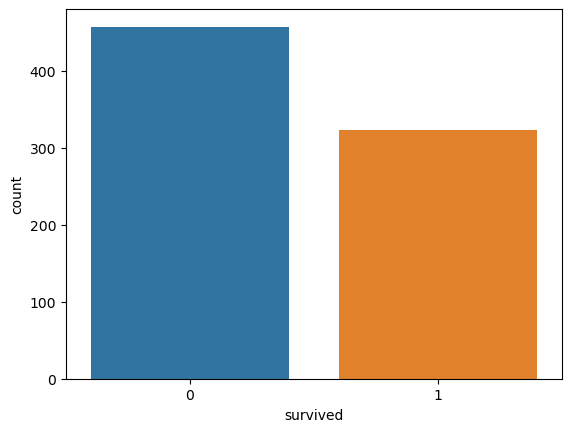

In [14]:
sns.countplot('survived',data=df)
plt.show()

From the above graph it is clear that not many persons survived. Out of 891 persons in training dataset only 350 survived. 


In [15]:
a = (df.groupby(['sex', 'survived','age'])['survived'].count())

In [16]:
male = a['male']

In [17]:
female = a['female']

<AxesSubplot:xlabel='survived', ylabel='Count'>

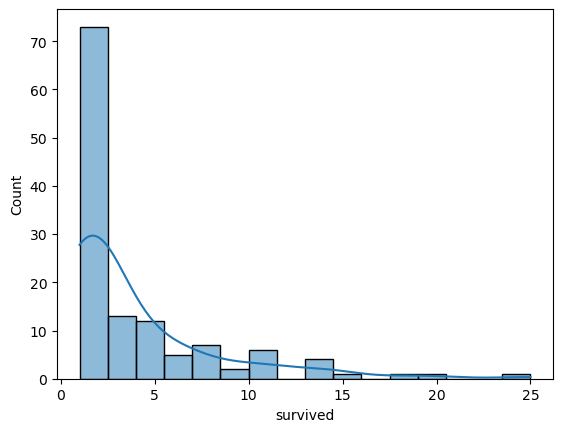

In [18]:
sns.histplot(male,kde=True)

- the data is right skewed

<AxesSubplot:xlabel='survived', ylabel='Count'>

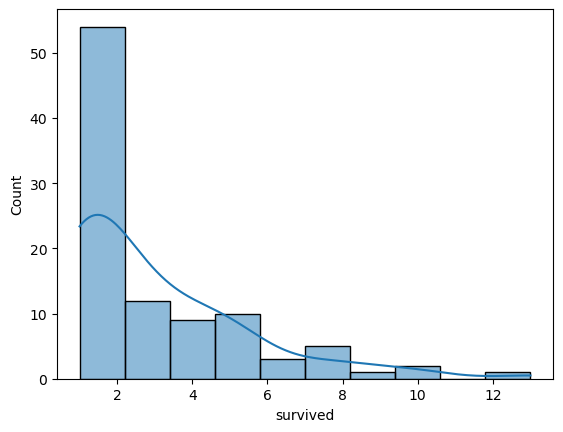

In [19]:
sns.histplot(female,kde=True)

-  mostly the age group between 2 year to 20 years are survived 

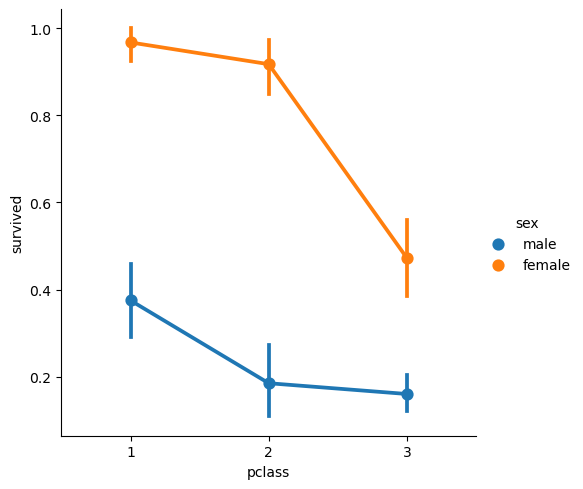

In [20]:
sns.factorplot('pclass', 'survived', hue='sex', data=df)
plt.show()


- by using factor plot we can see that both the male and female who are in pclass 1 survived more and died in the pclass 3

In [21]:
# step - 1 || finding the targate variable and predict variable 
x = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone']]
y = df['survived']

### splitting the data into train and test

In [22]:
from sklearn.model_selection  import train_test_split

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,
                                           test_size=0.32,
                                           random_state = 23)

In [24]:
xtrain

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
211,3,male,22.0,0,0,9.3500,S,Third,man,True,C,Southampton,no,True
704,1,male,11.0,1,2,120.0000,S,First,child,False,B,Southampton,yes,False
569,3,male,25.0,0,0,56.4958,S,Third,man,True,C,Southampton,yes,True
643,2,female,30.0,3,0,21.0000,S,Second,woman,False,C,Southampton,yes,False
653,1,male,36.0,1,0,78.8500,S,First,man,True,C,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,1,female,37.0,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
488,1,male,64.0,0,0,26.0000,S,First,man,True,C,Southampton,no,True
40,3,female,40.0,1,0,9.4750,S,Third,woman,False,C,Southampton,no,False
742,3,male,42.0,0,0,7.5500,S,Third,man,True,C,Southampton,no,True


In [25]:
xtest

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
59,3,male,22.00,0,0,7.2292,C,Third,man,True,C,Cherbourg,no,True
666,2,female,48.00,1,2,65.0000,S,Second,woman,False,C,Southampton,yes,False
207,3,male,16.00,0,0,8.0500,S,Third,man,True,C,Southampton,yes,True
19,3,female,14.25,0,0,7.2250,C,Third,woman,False,C,Cherbourg,yes,True
302,1,female,36.00,0,0,135.6333,C,First,woman,False,C,Cherbourg,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,3,male,11.00,5,2,46.9000,S,Third,child,False,C,Southampton,no,False
366,2,male,23.00,0,0,10.5000,S,Second,man,True,C,Southampton,no,True
50,3,male,21.00,0,0,7.8000,S,Third,man,True,C,Southampton,no,True
248,3,female,20.00,0,0,7.7500,Q,Third,woman,False,C,Queenstown,no,True


### splliting into continious and categoricaal 

In [26]:
xtest_continuous_cols = xtest.select_dtypes(include=[np.float64, np.float32, np.int64, np.int32])
xtest_cat_cols = xtest.select_dtypes(include=['category', 'object'])

In [119]:
xtest_continuous_cols

,age,fare
59,22.00,7.2292
666,48.00,65.0000
207,16.00,8.0500
19,14.25,7.2250
302,36.00,135.6333
...,...,...
58,11.00,46.9000
366,23.00,10.5000
50,21.00,7.8000
248,20.00,7.7500


In [120]:
xtest_cat_cols

,pclass,sex,sibsp,parch,adult_male,embark_town,alone
59,3,male,0,0,True,Cherbourg,True
666,2,female,1,2,False,Southampton,False
207,3,male,0,0,True,Southampton,True
19,3,female,0,0,False,Cherbourg,True
302,1,female,0,0,False,Cherbourg,True
...,...,...,...,...,...,...,...
58,3,male,5,2,False,Southampton,False
366,2,male,0,0,True,Southampton,True
50,3,male,0,0,True,Southampton,True
248,3,female,0,0,False,Queenstown,True


In [29]:
xtrain_continuous_cols = xtrain.select_dtypes(include=[np.float64, np.float32, np.int64, np.int32])
xtrain_cat_cols = xtrain.select_dtypes(include=['category', 'object'])

In [30]:
xtrain_cat_cols

,pclass,sex,sibsp,parch,embarked,class,who,adult_male,deck,embark_town,alive,alone
211,3,male,0,0,S,Third,man,True,C,Southampton,no,True
704,1,male,1,2,S,First,child,False,B,Southampton,yes,False
569,3,male,0,0,S,Third,man,True,C,Southampton,yes,True
643,2,female,3,0,S,Second,woman,False,C,Southampton,yes,False
653,1,male,1,0,S,First,man,True,C,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...
31,1,female,1,0,C,First,woman,False,B,Cherbourg,yes,False
488,1,male,0,0,S,First,man,True,C,Southampton,no,True
40,3,female,1,0,S,Third,woman,False,C,Southampton,no,False
742,3,male,0,0,S,Third,man,True,C,Southampton,no,True


In [121]:
xtrain_continuous_cols

,age,fare
211,22.0,9.3500
704,11.0,120.0000
569,25.0,56.4958
643,30.0,21.0000
653,36.0,78.8500
...,...,...
31,37.0,146.5208
488,64.0,26.0000
40,40.0,9.4750
742,42.0,7.5500


In [122]:
# checking for outliers for selecting the best scaling teachnique

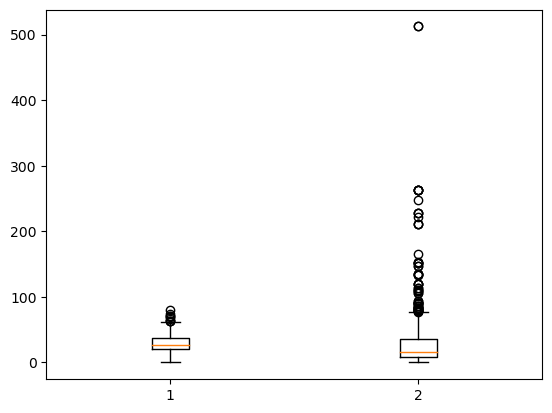

In [31]:
plt.boxplot(xtrain_continuous_cols[['age','fare']])
plt.show()

- Both the age and fare column contain outliers so i am using the roboust scaling because which is not effected that much compared to other scaling methods because it works on quartiles and median of the data

In [32]:
from sklearn.preprocessing import RobustScaler

In [33]:
rs = RobustScaler()

In [34]:
continuous_scale = pd.DataFrame(rs.fit_transform(xtrain_continuous_cols),columns =xtrain_continuous_cols.columns,index = xtrain_continuous_cols.index)

In [123]:
# checking the distribution of the data (every ml model assumes that every model folows normal distribution)

<AxesSubplot:xlabel='age', ylabel='Count'>

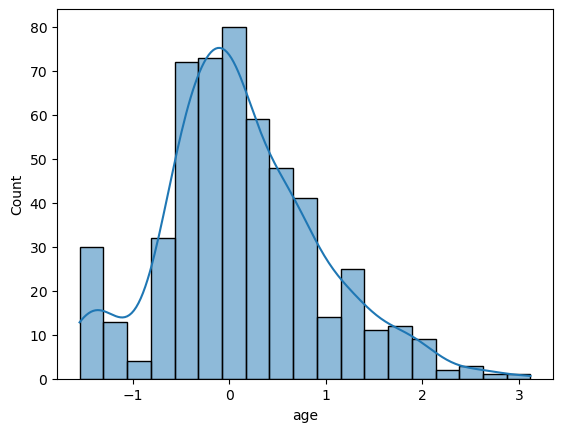

In [35]:
sns.histplot(continuous_scale['age'],kde=True)

<AxesSubplot:xlabel='fare', ylabel='Count'>

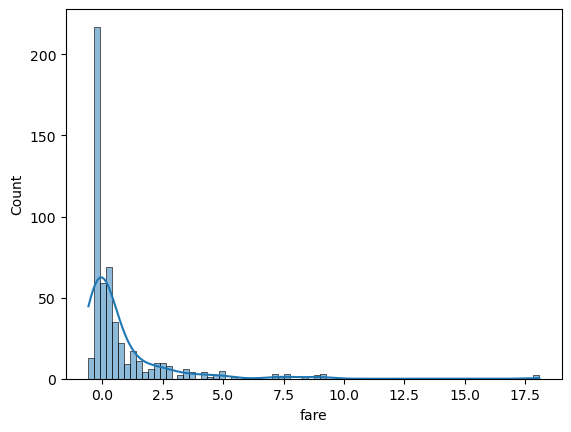

In [36]:
sns.histplot(continuous_scale['fare'],kde=True)

both the columns are not normally distributed so making them to follow normal distribution using power transformation(yeo_johnson)

In [37]:
from sklearn.preprocessing import PowerTransformer

In [124]:
pt = PowerTransformer() # default will be yeo_johnson

In [39]:
power_continuous = pd.DataFrame(pt.fit_transform(continuous_scale),columns = continuous_scale.columns,index = continuous_scale.index)

<AxesSubplot:xlabel='age', ylabel='Count'>

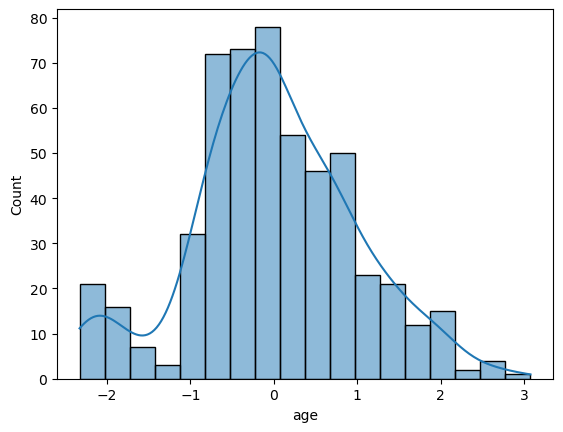

In [40]:
sns.histplot(power_continuous['age'],kde=True)

<AxesSubplot:xlabel='fare', ylabel='Count'>

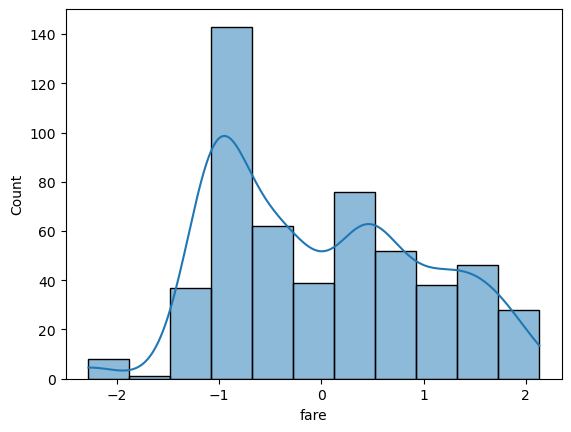

In [41]:
sns.histplot(power_continuous['fare'],kde=True)

- compare to before plots it is much more better and looks that following normal distribution

In [125]:
# using QQ plot checking the normality 

In [42]:
import scipy
from scipy import stats

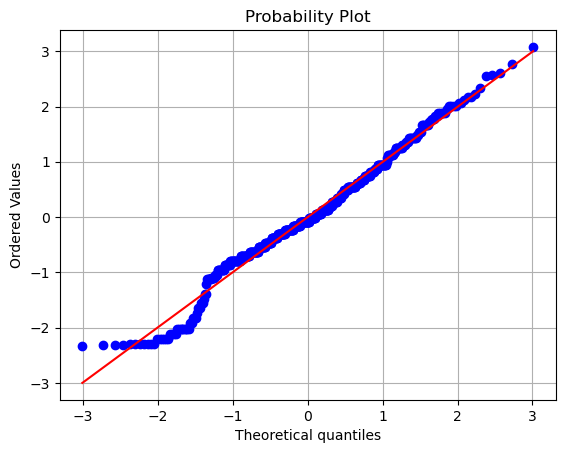

In [43]:
stats.probplot(power_continuous['age'],dist = 'norm', plot=plt)
plt.grid()

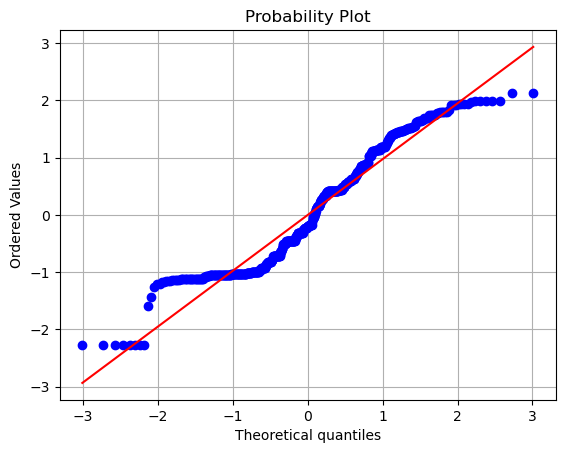

In [44]:
stats.probplot(power_continuous['fare'],dist = 'norm', plot=plt)
plt.grid()

In [45]:
xtrain_cat_cols

,pclass,sex,sibsp,parch,embarked,class,who,adult_male,deck,embark_town,alive,alone
211,3,male,0,0,S,Third,man,True,C,Southampton,no,True
704,1,male,1,2,S,First,child,False,B,Southampton,yes,False
569,3,male,0,0,S,Third,man,True,C,Southampton,yes,True
643,2,female,3,0,S,Second,woman,False,C,Southampton,yes,False
653,1,male,1,0,S,First,man,True,C,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...
31,1,female,1,0,C,First,woman,False,B,Cherbourg,yes,False
488,1,male,0,0,S,First,man,True,C,Southampton,no,True
40,3,female,1,0,S,Third,woman,False,C,Southampton,no,False
742,3,male,0,0,S,Third,man,True,C,Southampton,no,True


In [46]:
# dropping some columns which are repeated 
xtrain_cat_cols.drop(['embarked', 'deck', 'who', 'class', 'alive'], axis=1, inplace=True)

In [47]:
xtrain_cat_cols

,pclass,sex,sibsp,parch,adult_male,embark_town,alone
211,3,male,0,0,True,Southampton,True
704,1,male,1,2,False,Southampton,False
569,3,male,0,0,True,Southampton,True
643,2,female,3,0,False,Southampton,False
653,1,male,1,0,True,Southampton,False
...,...,...,...,...,...,...,...
31,1,female,1,0,False,Cherbourg,False
488,1,male,0,0,True,Southampton,True
40,3,female,1,0,False,Southampton,False
742,3,male,0,0,True,Southampton,True


In [48]:
# train data ordianal data columns 
# pclass,sibsp,parch adult_male,alone
xtrain_ord_cat_cols= xtrain_cat_cols[['pclass','sibsp','parch','adult_male','alone']]
xtrain_ord_cat_cols

,pclass,sibsp,parch,adult_male,alone
211,3,0,0,True,True
704,1,1,2,False,False
569,3,0,0,True,True
643,2,3,0,False,False
653,1,1,0,True,False
...,...,...,...,...,...
31,1,1,0,False,False
488,1,0,0,True,True
40,3,1,0,False,False
742,3,0,0,True,True


In [49]:
#train data nominal data columns 
#sex , embarked_town
xtrain_nominal_cat_cols = xtrain_cat_cols[['sex','embark_town']]

In [50]:
xtrain_nominal_cat_cols

,sex,embark_town
211,male,Southampton
704,male,Southampton
569,male,Southampton
643,female,Southampton
653,male,Southampton
...,...,...
31,female,Cherbourg
488,male,Southampton
40,female,Southampton
742,male,Southampton


### ordinal encoding for ordinal columns

In [51]:
# ordinal column encoding 
for col in xtrain_ord_cat_cols.columns:
    unique_vals = xtrain_ord_cat_cols[col].unique()
    print(f"Unique values in column '{col} is ': {unique_vals}")

Unique values in column 'pclass is ': [3 1 2]
Unique values in column 'sibsp is ': [0 1 3 4 2 5 8]
Unique values in column 'parch is ': [0 2 1 3 4 5]
Unique values in column 'adult_male is ': [True False]
Unique values in column 'alone is ': [True False]


In [52]:
# importing ordinal scaler
from sklearn.preprocessing import OrdinalEncoder

In [53]:
oe = OrdinalEncoder(categories=[[1,2,3],[0,1,2,3,4,5,8],[0,1,2,3,4,5,6],[True,False],[True,False]])

In [54]:
# ordinal encoding
train_cat_oe = pd.DataFrame(oe.fit_transform(xtrain_ord_cat_cols),index = xtrain_ord_cat_cols.index,columns = xtrain_ord_cat_cols.columns)
train_cat_oe

,pclass,sibsp,parch,adult_male,alone
211,2.0,0.0,0.0,0.0,0.0
704,0.0,1.0,2.0,1.0,1.0
569,2.0,0.0,0.0,0.0,0.0
643,1.0,3.0,0.0,1.0,1.0
653,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
31,0.0,1.0,0.0,1.0,1.0
488,0.0,0.0,0.0,0.0,0.0
40,2.0,1.0,0.0,1.0,1.0
742,2.0,0.0,0.0,0.0,0.0


### one-hot encoding

In [55]:
# one-hot encoding
from sklearn.preprocessing import OneHotEncoder

In [56]:
oh = OneHotEncoder(sparse = False)  # sparse = False for selecting the complete dataset

In [57]:
train_cat_oh = pd.DataFrame(oh.fit_transform(xtrain_nominal_cat_cols),columns = oh.get_feature_names_out(xtrain_nominal_cat_cols.columns),index =xtrain_nominal_cat_cols.index )

In [58]:
train_cat_oh

,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
211,0.0,1.0,0.0,0.0,1.0
704,0.0,1.0,0.0,0.0,1.0
569,0.0,1.0,0.0,0.0,1.0
643,1.0,0.0,0.0,0.0,1.0
653,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
31,1.0,0.0,1.0,0.0,0.0
488,0.0,1.0,0.0,0.0,1.0
40,1.0,0.0,0.0,0.0,1.0
742,0.0,1.0,0.0,0.0,1.0


In [59]:
# creating a new data frame by concating the other data frames ofter scaling and transformation
trained_data1 = pd.concat([power_continuous,train_cat_oe,train_cat_oh],axis = 1)

In [60]:
trained_data1

,age,fare,pclass,sibsp,parch,adult_male,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
211,-0.466406,-0.844018,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
704,-1.387376,1.685895,0.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
569,-0.233161,1.187345,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
643,0.134949,0.156138,1.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
653,0.546972,1.437697,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31,0.613139,1.780698,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
488,2.225826,0.411027,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
40,0.808003,-0.829077,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
742,0.935136,-1.070835,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [61]:
# test data

In [62]:
xtest_continuous_cols = xtest.select_dtypes(include=[np.float64, np.float32, np.int64, np.int32])
xtest_cat_cols = xtest.select_dtypes(include=['category', 'object'])

In [63]:
xtest_continuous_cols

,age,fare
59,22.00,7.2292
666,48.00,65.0000
207,16.00,8.0500
19,14.25,7.2250
302,36.00,135.6333
...,...,...
58,11.00,46.9000
366,23.00,10.5000
50,21.00,7.8000
248,20.00,7.7500


In [64]:
continuous_scale_test = pd.DataFrame(rs.fit_transform(xtest_continuous_cols),columns =xtest_continuous_cols.columns,index = xtest_continuous_cols.index)

In [65]:
power_continuous_test = pd.DataFrame(pt.fit_transform(continuous_scale_test),columns = continuous_scale_test.columns,index = continuous_scale_test.index)

In [66]:
power_continuous_test

,age,fare
59,-0.571941,-1.119140
666,1.213807,1.324758
207,-1.053104,-1.012314
19,-1.197756,-1.119698
302,0.444233,1.798091
...,...,...
58,-1.471130,1.049661
366,-0.494150,-0.717391
50,-0.650451,-1.044418
248,-0.729658,-1.050884


In [67]:
xtest_cat_cols

,pclass,sex,sibsp,parch,embarked,class,who,adult_male,deck,embark_town,alive,alone
59,3,male,0,0,C,Third,man,True,C,Cherbourg,no,True
666,2,female,1,2,S,Second,woman,False,C,Southampton,yes,False
207,3,male,0,0,S,Third,man,True,C,Southampton,yes,True
19,3,female,0,0,C,Third,woman,False,C,Cherbourg,yes,True
302,1,female,0,0,C,First,woman,False,C,Cherbourg,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...
58,3,male,5,2,S,Third,child,False,C,Southampton,no,False
366,2,male,0,0,S,Second,man,True,C,Southampton,no,True
50,3,male,0,0,S,Third,man,True,C,Southampton,no,True
248,3,female,0,0,Q,Third,woman,False,C,Queenstown,no,True


In [68]:
xtest_cat_cols.drop(['embarked', 'deck', 'who', 'class', 'alive'], axis=1, inplace=True)


In [69]:
xtest_cat_cols

,pclass,sex,sibsp,parch,adult_male,embark_town,alone
59,3,male,0,0,True,Cherbourg,True
666,2,female,1,2,False,Southampton,False
207,3,male,0,0,True,Southampton,True
19,3,female,0,0,False,Cherbourg,True
302,1,female,0,0,False,Cherbourg,True
...,...,...,...,...,...,...,...
58,3,male,5,2,False,Southampton,False
366,2,male,0,0,True,Southampton,True
50,3,male,0,0,True,Southampton,True
248,3,female,0,0,False,Queenstown,True


In [70]:
xtest_ord_cat_cols= xtest_cat_cols[['pclass','sibsp','parch','adult_male','alone']]
xtest_ord_cat_cols

,pclass,sibsp,parch,adult_male,alone
59,3,0,0,True,True
666,2,1,2,False,False
207,3,0,0,True,True
19,3,0,0,False,True
302,1,0,0,False,True
...,...,...,...,...,...
58,3,5,2,False,False
366,2,0,0,True,True
50,3,0,0,True,True
248,3,0,0,False,True


In [71]:
xtest_nominal_cat_cols = xtest_cat_cols[['sex','embark_town']]

In [72]:
oe = OrdinalEncoder(categories=[[1,2,3],[0,1,2,3,4,5,8],[0,1,2,3,4,5,6],[True,False],[True,False]])

In [73]:
test_cat_oe = pd.DataFrame(oe.fit_transform(xtest_ord_cat_cols),index = xtest_ord_cat_cols.index,columns = xtest_ord_cat_cols.columns)
test_cat_oe

,pclass,sibsp,parch,adult_male,alone
59,2.0,0.0,0.0,0.0,0.0
666,1.0,1.0,2.0,1.0,1.0
207,2.0,0.0,0.0,0.0,0.0
19,2.0,0.0,0.0,1.0,0.0
302,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
58,2.0,5.0,2.0,1.0,1.0
366,1.0,0.0,0.0,0.0,0.0
50,2.0,0.0,0.0,0.0,0.0
248,2.0,0.0,0.0,1.0,0.0


In [74]:
test_cat_oh = pd.DataFrame(oh.fit_transform(xtest_nominal_cat_cols),columns = oh.get_feature_names_out(xtest_nominal_cat_cols.columns),index =xtest_nominal_cat_cols.index )

In [75]:
test_cat_oh

,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
59,0.0,1.0,1.0,0.0,0.0
666,1.0,0.0,0.0,0.0,1.0
207,0.0,1.0,0.0,0.0,1.0
19,1.0,0.0,1.0,0.0,0.0
302,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
58,0.0,1.0,0.0,0.0,1.0
366,0.0,1.0,0.0,0.0,1.0
50,0.0,1.0,0.0,0.0,1.0
248,1.0,0.0,0.0,1.0,0.0


In [76]:
test_data1 = pd.concat([power_continuous_test,test_cat_oe,test_cat_oh],axis=1)

In [77]:
test_data1

,age,fare,pclass,sibsp,parch,adult_male,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
59,-0.571941,-1.119140,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
666,1.213807,1.324758,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
207,-1.053104,-1.012314,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
19,-1.197756,-1.119698,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
302,0.444233,1.798091,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
58,-1.471130,1.049661,2.0,5.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
366,-0.494150,-0.717391,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
50,-0.650451,-1.044418,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
248,-0.729658,-1.050884,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


# logistic regression on transformed and scaled data

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression

In [79]:
lr = LogisticRegression()

In [80]:
ytrain = ytrain.astype(int)
ytest = ytest.astype(int)

In [81]:
lr.fit(trained_data1,ytrain)

LogisticRegression()

In [82]:
ytestpred = lr.predict(test_data1)
ytrainpred=lr.predict(trained_data1)

In [83]:
from sklearn.metrics import accuracy_score as acs,confusion_matrix
acs(ytrain,ytrainpred),acs(ytest,ytestpred)

(0.8207547169811321, 0.78)

In [84]:
confusion_matrix(ytrain,ytrainpred)

array([[270,  43],
       [ 52, 165]], dtype=int64)

In [85]:
confusion_matrix(ytest,ytestpred)

array([[124,  20],
       [ 35,  71]], dtype=int64)

# applying decesion tree on transformed and scaled data

In [86]:
# decession tree
from sklearn.tree import DecisionTreeClassifier

In [87]:
dtc = DecisionTreeClassifier()

In [88]:
dtc.fit(trained_data1,ytrain)

DecisionTreeClassifier()

In [89]:
ytestpred = dtc.predict(test_data1)
ytrainpred=dtc.predict(trained_data1)

In [90]:
acs(ytrain,ytrainpred),acs(ytest,ytestpred)

(0.9849056603773585, 0.72)

In [91]:
confusion_matrix(ytrain,ytrainpred)

array([[313,   0],
       [  8, 209]], dtype=int64)

In [92]:
confusion_matrix(ytest,ytestpred)

array([[111,  33],
       [ 37,  69]], dtype=int64)

In [127]:
# data 2 of not trained data but encoded categorical columns (model will not takoing the un encoded data)

In [95]:
xtest_continuous_cols = xtest.select_dtypes(include=[np.float64, np.float32, np.int64, np.int32])

In [96]:
xtest_continuous_cols

,age,fare
59,22.00,7.2292
666,48.00,65.0000
207,16.00,8.0500
19,14.25,7.2250
302,36.00,135.6333
...,...,...
58,11.00,46.9000
366,23.00,10.5000
50,21.00,7.8000
248,20.00,7.7500


In [97]:
xtrain_continuous_cols = xtrain.select_dtypes(include=[np.float64, np.float32, np.int64, np.int32])

In [98]:
xtrain_continuous_cols

,age,fare
211,22.0,9.3500
704,11.0,120.0000
569,25.0,56.4958
643,30.0,21.0000
653,36.0,78.8500
...,...,...
31,37.0,146.5208
488,64.0,26.0000
40,40.0,9.4750
742,42.0,7.5500


In [99]:
test_cat_oh

,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
59,0.0,1.0,1.0,0.0,0.0
666,1.0,0.0,0.0,0.0,1.0
207,0.0,1.0,0.0,0.0,1.0
19,1.0,0.0,1.0,0.0,0.0
302,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
58,0.0,1.0,0.0,0.0,1.0
366,0.0,1.0,0.0,0.0,1.0
50,0.0,1.0,0.0,0.0,1.0
248,1.0,0.0,0.0,1.0,0.0


In [100]:
test_cat_oe

,pclass,sibsp,parch,adult_male,alone
59,2.0,0.0,0.0,0.0,0.0
666,1.0,1.0,2.0,1.0,1.0
207,2.0,0.0,0.0,0.0,0.0
19,2.0,0.0,0.0,1.0,0.0
302,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
58,2.0,5.0,2.0,1.0,1.0
366,1.0,0.0,0.0,0.0,0.0
50,2.0,0.0,0.0,0.0,0.0
248,2.0,0.0,0.0,1.0,0.0


In [101]:
test_data2 = pd.concat([xtest_continuous_cols,test_cat_oe,test_cat_oh],axis = 1)

In [102]:
test_data2

,age,fare,pclass,sibsp,parch,adult_male,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
59,22.00,7.2292,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
666,48.00,65.0000,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
207,16.00,8.0500,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
19,14.25,7.2250,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
302,36.00,135.6333,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
58,11.00,46.9000,2.0,5.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
366,23.00,10.5000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
50,21.00,7.8000,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
248,20.00,7.7500,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [104]:
train_data2 = pd.concat([xtrain_continuous_cols,train_cat_oe,train_cat_oh],axis = 1)

In [105]:
train_data2

,age,fare,pclass,sibsp,parch,adult_male,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
211,22.0,9.3500,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
704,11.0,120.0000,0.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
569,25.0,56.4958,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
643,30.0,21.0000,1.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
653,36.0,78.8500,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31,37.0,146.5208,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
488,64.0,26.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
40,40.0,9.4750,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
742,42.0,7.5500,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# logistic regression on data 2

In [106]:
lr.fit(train_data2,ytrain)

LogisticRegression()

In [107]:
ytestpred = lr.predict(test_data2)
ytrainpred=lr.predict(train_data2)

In [108]:
from sklearn.metrics import accuracy_score as acs,confusion_matrix
acs(ytrain,ytrainpred),acs(ytest,ytestpred)

(0.8188679245283019, 0.772)

In [109]:
confusion_matrix(ytrain,ytrainpred)

array([[270,  43],
       [ 53, 164]], dtype=int64)

In [110]:
confusion_matrix(ytest,ytestpred)

array([[124,  20],
       [ 37,  69]], dtype=int64)

# DEcesion Tree on data 2

In [111]:
dtc.fit(train_data2,ytrain)

DecisionTreeClassifier()

In [112]:
ytestpred = dtc.predict(test_data2)
ytrainpred=dtc.predict(train_data2)

In [113]:
from sklearn.metrics import accuracy_score as acs,confusion_matrix
acs(ytrain,ytrainpred),acs(ytest,ytestpred)

(0.9849056603773585, 0.748)

In [114]:
confusion_matrix(ytrain,ytrainpred)

array([[313,   0],
       [  8, 209]], dtype=int64)

In [116]:
confusion_matrix(ytest,ytestpred)

array([[118,  26],
       [ 37,  69]], dtype=int64)

# conclusion

### Logistic Regression:

- Before transformation and scaling: The accuracy was 0.818 on train data and 0.772 on test data. The confusion matrix for the     test data was [[124, 20], [35, 71]].

- After transformation and scaling: The accuracy improved slightly to 0.821 on train data and 0.780 on test data. The confusion   matrix for the test data was [[124, 20], [35, 71]].

##### Insights: In this case the improvement in accuracy after transformation and scaling was not significant. This suggests that the logistic regression model may not be very sensitive to the scaling and transformation of the data.

### Decision Tree:

- Before transformation and scaling: The accuracy was 0.985 on train data and 0.748 on test data. The confusion matrix for the     test data was [[118, 26], [37, 69]].

- After transformation and scaling: The accuracy on the train data remained the same at 0.985, while the accuracy on the test     data decreased slightly to 0.720. The confusion matrix for the test data was [[111, 33], [37, 69]].

##### Insights: In this case, the accuracy on the train data remained the same after transformation and scaling, while the accuracy on the test data decreased slightly. This suggests that the decision tree model may be sensitive to the scaling and transformation of the data.


- Comparing the results, it seems that the decision tree model performed better than the logistic regression model. The decision   tree model had higher accuracy on both the train and test datasets after transformation and scaling, whereas the logistic       regression model had only a slight increase in accuracy after transformation and scaling.

- This could be because decision trees are able to capture more complex relationships between the input features and the target   variable compared to logistic regression. Additionally, decision trees are non-linear models and are able to handle non-linear   relationships in the data, while logistic regression assumes a linear relationship.